In [2]:
import numpy as np
import pandas as pd
from scipy import io
from scipy.stats import ranksums
from entropy.MCRDE.MCRDE import MCRDE
from entropy.MDE.MDE import MDE
from utils.plot_Entropy import plot_Entropy
from utils.write_txt import write_txt
import matplotlib.pyplot as plt 

# Multiscale Entropy method

* ### MCRDE : Multiscale Cumulative Residual Dispersion Entropy
* ### MDE : Multiscale Dispersion Entropy

   | 파라미터 | 설명 | 예시 |
   |--------|:-------|--------:|
   | N | 데이터의 길이 |  N=1000이면 데이터 x의 인자의 수가 1000 |
   | m | '분산 패턴' 인자의 수 | m=3이면 (1,3,3) |
   | c | 1부터 c까지의 정수로 맵핑됨 | c=3이면 원래의 데이터(1,5,10),맵핑된 데이터(1,2,3) |
   | tau | 분산 패턴'을 얼마 만큼의 간격으로 출력할지 결정 | tau=2이면 (1,5,6,7,10) -> (1,6,10) |
   | scale | 데이터를 묶는 단위,맵핑된 데이터의 개수는 N/scale | scale=2이면 데이터 x (1,2,5,6,10,12) -> (2.5,5.5,11) |
   

### Entropy method option

In [3]:
# 사용하고자 하는 Multiscale Entropy 기법을 입력(ex. 'MCRDE', 'MDE')
Entropy_method = 'MDE'

### parameters of each Entropy method

In [4]:
# dict 자료형의 key는 method의 string(name) value는 함수로 구성됨 
Entropy_dict = {'MCRDE':MCRDE, 'MDE':MDE}

# Multiscale Entropy parameter

# MCRDE paramter
if Entropy_method == 'MCRDE':
    N = 1000   # RRIs data length
    m = 3   # embedding dimension
    c = 6  # number of class
    tau = 1    # delay factor
    scale = 25    # scale factor

# MDE paramter
elif Entropy_method == 'MDE':
    N = 1000  # RRIs data length
    m = 3    # embedding dimension
    c = 6    # number of class
    tau = 1   # delay factor
    scale = 25   # scale factor

# Data Preparation

In [5]:
dataFlag ="data1"
if dataFlag =="data1":
    # 심부전 실험 데이터
    # Load RRIs data(type:numpy array, row:subjects, col:RRIs data of subjects)
    RRIs_CHF_path = './sample_data/RRIs_CHF_1000'          # CHF(= Congestive Heart Failure) -> 울혈성 심부전 피험자 14명의 RRIs data
    RRIs_HEALTHY_path = './sample_data/RRIs_HEALTHY_1000'  # HEALTHY                         -> 건강한 피험자 14명 RRIs data
    RRIs_CHF_data = io.loadmat(RRIs_CHF_path)
    RRIs_CHF_1000 = RRIs_CHF_data['RRIs_CHF_1000']              # Load RRIs data of CHF(length=1000) 
    RRIs_HEALTHY_data = io.loadmat(RRIs_HEALTHY_path)
    RRIs_HEALTHY_1000 = RRIs_HEALTHY_data['RRIs_HEALTHY_1000']  # Load RRIs data of HEALTHY(length=1000)
    data0 = RRIs_CHF_1000[:N]
    data1 = RRIs_HEALTHY_1000[:N]
    
#Q. 다른 추가 실험 Data 제공이 가능할까요? (다른 도메인)

#### inputShape: (subject, timepointData) ex) 14명의 실험자에 대한 1000개 길이의 데이터

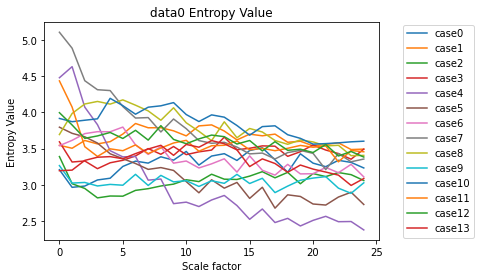

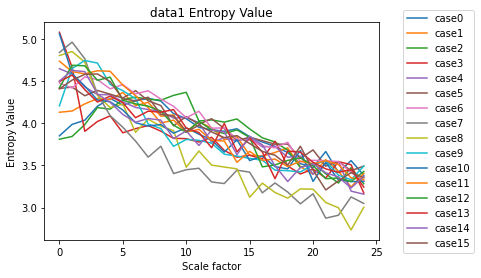

In [6]:
def getEntropy_Result(data,Entropy_method):
    n_s = len(data) # number of subject 
    Entropy_data = pd.DataFrame()
    for i in range(n_s):
        index_name = 'case'+str(i)
        # Calculate Mutiscale Entropy Value
        Entropy_dataValue = pd.Series(Entropy_dict[Entropy_method](data[i, :], m, c, 
                                                                    tau, scale).reshape(-1))
        Entropy_data[index_name] = Entropy_dataValue
    return Entropy_data

Entropy_data0 = getEntropy_Result(data0,Entropy_method)
Entropy_data1 = getEntropy_Result(data1,Entropy_method)

Entropy_data0.plot()
plt.title('data0 Entropy Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
Entropy_data1.plot()
plt.title('data1 Entropy Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))


In [7]:
# Calculate Multiscale Entropy average value
avg_me_data0 = np.mean(Entropy_data0, axis=1)
avg_me_data1= np.mean(Entropy_data1, axis=1)
# Calculate Multiscale Entropy std value
std_me_data0 = np.std(Entropy_data0, axis=1)
std_me_data1= np.std(Entropy_data1, axis=1)

In [8]:
list(avg_me_data0)

[3.795951200105361,
 3.68635203516561,
 3.591600591004429,
 3.5432693786508684,
 3.5483003747422295,
 3.533904427207056,
 3.5422242583538384,
 3.483483968972626,
 3.5086226365927415,
 3.471725368472917,
 3.4384656606027315,
 3.3720447675615697,
 3.4303668681122743,
 3.4461749228606573,
 3.371619509739157,
 3.3407990221682584,
 3.3653330499312273,
 3.2846774570683723,
 3.2729619702750776,
 3.2867339635407045,
 3.270358627417795,
 3.2577257061417444,
 3.239279168567474,
 3.2192030513042544,
 3.1995807802591805]

In [9]:
p = np.zeros(scale)              # p-value between CHF and Healthy subjects(scale 1~25)
for index in Entropy_data0.index:
    s, p[index] = ranksums(Entropy_data0.iloc[index],Entropy_data1.iloc[index])
    print(s, p[index])

-3.2425028735211057 0.0011848475343312819
-3.408785072163214 0.0006525286782358334
-4.115484416392173 3.8636710248127246e-05
-4.3649077143553345 1.2717643781034726e-05
-4.073913866731646 4.6229585026358447e-05
-4.3233371646948076 1.536865827635845e-05
-4.1570549660527 3.2237644818117924e-05
-4.115484416392173 3.8636710248127246e-05
-4.1570549660527 3.2237644818117924e-05
-3.2425028735211057 0.0011848475343312819
-3.575067270805322 0.00035013785580523737
-3.9492022177500647 7.84120901566818e-05
-3.2840734231816326 0.001023182622289736
-2.951509025897417 0.0031622530390322643
-3.2009323238605787 0.00136983701666273
-3.1593617742000517 0.001581150837602339
-2.452662429971093 0.014180334226590175
-2.120098032686877 0.03399777884079311
-2.348736055819775 0.018837254666670262
-1.7251778109118705 0.0844954332094131
-1.2263312149855465 0.22007405924801815
-1.1847606653250193 0.2361120888584003
-0.8937668177013305 0.371446666569756
-0.623558244907905 0.5329177397262714
-0.332564397284216 0.7394

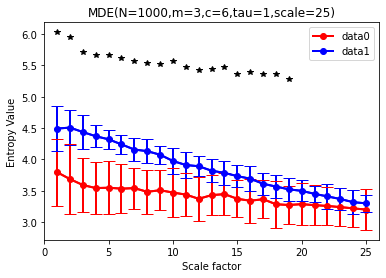

In [10]:
# plot parameter                                         
subject = np.array(['data0', 'data1'])                        # 비교군: data0, data1 subject
plt_color = np.array(['red','blue'])                          # data0 MCRDE plot: 빨간색, data1 MCRDE plot: 파란색
MCRDE_params = {'N':N,'m':m,'c':c,'tau':tau,'scale':scale}                 # MCRDE parameter
MDE_params = {'N':N,'m':m,'c':c,'tau':tau,'scale':scale}                   # MDE parameter
# Multiscale Entropy paramter(자료형 dict) key는 method의 string(=name), value는 method의
# paramter
plt_params_dict = {'MCRDE':MCRDE_params, 'MDE':MDE_params}


# figure
Entropy = plot_Entropy(Entropy_method,
                            subject,
                            plt_color,
                            avg_me_data0,
                            avg_me_data1,
                            std_me_data0,
                            std_me_data1,
                            p,
                            plt_params_dict)

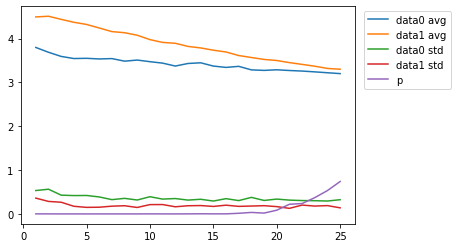

In [21]:
# plot의 x축(scale)
x = np.arange(1,scale+1)
fig, ax = plt.subplots()
# plot의 y축
ax.plot(x,avg_me_data0)      # data0의 엔트로피 평균 값
ax.plot(x,avg_me_data1)      # data1의 엔트로피 평균 값
ax.plot(x,std_me_data0)      # data0의 엔트로피 표준편차 값
ax.plot(x,std_me_data1)      # data1의 엔트로피 표준편차 값
ax.plot(x,p)                 # data0와 data1 사이의 p의 값
plt.legend(['data0 avg','data1 avg','data0 std','data1 std','p'],
            loc='right', bbox_to_anchor=(1.3, 0.8))
plt.show()

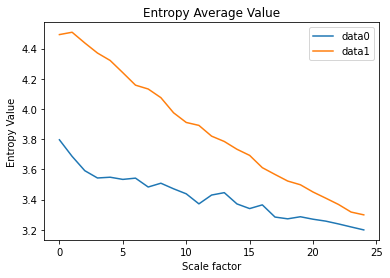

In [14]:
avg_me_data0.plot()
avg_me_data1.plot()

plt.title('Entropy Average Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(['data0','data1'])

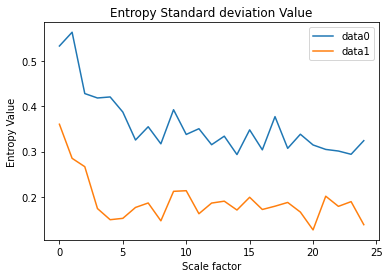

In [15]:
std_me_data0.plot()
std_me_data1.plot()

plt.title('Entropy Standard deviation Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(['data0','data1'])

Text(0, 0.5, 'P value')

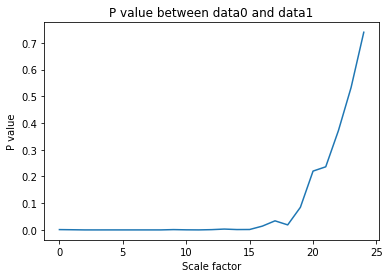

In [16]:
plt.plot(p)

plt.title('P value between data0 and data1')
plt.xlabel('Scale factor')
plt.ylabel('P value')


In [11]:
"""
### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.
# CHF, Healthy subjects는 각각 모두 14명이다.
# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. 
# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.
# index: scale, data: avg, std

avg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     
avg_mcrde_data1_path = './results/avg_mcrde_data1.txt' 
std_mcrde_data0_path = './results/std_mcrde_data0.txt'      
std_mcrde_data1_path = './results/std_mcrde_data1.txt'  

write_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,
          std_mcrde_chf_path, std_mcrde_healthy_path,
          avg_mcrde_chf, avg_mcrde_healthy,
          std_mcrde_chf, std_mcrde_healthy )
"""

"\n### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.\n# CHF, Healthy subjects는 각각 모두 14명이다.\n# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. \n# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.\n# index: scale, data: avg, std\n\navg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     \navg_mcrde_data1_path = './results/avg_mcrde_data1.txt' \nstd_mcrde_data0_path = './results/std_mcrde_data0.txt'      \nstd_mcrde_data1_path = './results/std_mcrde_data1.txt'  \n\nwrite_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,\n          std_mcrde_chf_path, std_mcrde_healthy_path,\n          avg_mcrde_chf, avg_mcrde_healthy,\n          std_mcrde_chf, std_mcrde_healthy )\n"